86 whiskies de malta se califican entre 0 y 4 para 12 categorías de sabor diferentes, incluyendo dulzura, ahumado, a nuez, etc. Además, las coordenadas de las destilerías nos permiten obtener información sobre la distancia por pares. Usando una combinación de estos conjuntos de datos, es posible buscar correlaciones entre atributos particulares del sabor y la ubicación física. Por ejemplo, ¿un recurso local compartido tiene un efecto significativo en los whiskies cercanos? Al utilizar datos de correlación, es posible proporcionar recomendaciones de whisky basadas en las preferencias particulares de un individuo.

https://www.kaggle.com/datasets/koki25ando/scotch-whisky-dataset

https://www.kaggle.com/datasets/yerkinmudebayev/sales-data-for-bulls

In [202]:
import os
import pandas as pd
import folium
import numpy as np
import random


df = pd.read_csv('C:/Users/WAGNER FERNÁNDEZ/Downloads/whisky.csv')
df

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,51.610100,-3.062042
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,52.528517,-1.985382
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,53.336380,-6.264557
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,53.177928,-6.801658
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,53.166428,-6.814346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,82,Tobermory,1,1,1,0,0,1,0,0,1,2,2,2,PA75 6NR,150450.000000,755070.000000
82,83,Tomatin,2,3,2,0,0,2,2,1,1,2,0,1,IV13 7YT,279120.000000,829630.000000
83,84,Tomintoul,0,3,1,0,0,2,2,1,1,2,1,2,AB37 9AQ,315100.000000,825560.000000
84,85,Tormore,2,2,1,0,0,1,0,1,2,1,0,0,PH26 3LR,315180.000000,834960.000000


In [203]:
numeric_columns = df.select_dtypes(include=['int64','float64']).columns

print('Analisis de las columnas númericas')

print(df[numeric_columns].describe())

Analisis de las columnas númericas
           RowID       Body  Sweetness      Smoky  Medicinal    Tobacco  \
count  86.000000  86.000000  86.000000  86.000000  86.000000  86.000000   
mean   43.500000   2.069767   2.290698   1.534884   0.546512   0.116279   
std    24.969982   0.930410   0.717287   0.863613   0.990032   0.322439   
min     1.000000   0.000000   1.000000   0.000000   0.000000   0.000000   
25%    22.250000   2.000000   2.000000   1.000000   0.000000   0.000000   
50%    43.500000   2.000000   2.000000   1.000000   0.000000   0.000000   
75%    64.750000   2.000000   3.000000   2.000000   1.000000   0.000000   
max    86.000000   4.000000   4.000000   4.000000   4.000000   1.000000   

           Honey      Spicy      Winey      Nutty      Malty     Fruity  \
count  86.000000  86.000000  86.000000  86.000000  86.000000  86.000000   
mean    1.244186   1.383721   0.976744   1.465116   1.802326   1.802326   
std     0.853175   0.784686   0.932760   0.821730   0.629094   0

In [204]:
df

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,51.610100,-3.062042
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,52.528517,-1.985382
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,53.336380,-6.264557
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,53.177928,-6.801658
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,53.166428,-6.814346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,82,Tobermory,1,1,1,0,0,1,0,0,1,2,2,2,PA75 6NR,150450.000000,755070.000000
82,83,Tomatin,2,3,2,0,0,2,2,1,1,2,0,1,IV13 7YT,279120.000000,829630.000000
83,84,Tomintoul,0,3,1,0,0,2,2,1,1,2,1,2,AB37 9AQ,315100.000000,825560.000000
84,85,Tormore,2,2,1,0,0,1,0,1,2,1,0,0,PH26 3LR,315180.000000,834960.000000


C:\Users\WAGNER FERNÁNDEZ\AppData\Local\Temp\ipykernel_1920\2214706752.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x = 'Distillery',
C:\Users\WAGNER FERNÁNDEZ\AppData\Local\Temp\ipykernel_1920\2214706752.py:14: UserWarning: 
The palette list has fewer values (12) than needed (86) and will cycle, which may produce an uninterpretable plot.
  g = sns.barplot(x = 'Distillery',
c:\Users\WAGNER FERNÁNDEZ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\WAGNER FERNÁNDEZ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: Futu

Text(0.5, 1.0, 'Gráfico No. 1 - Cantidad de documentos producidos en el aplicativo GEPOL año 2023 (Mes a Mes)')

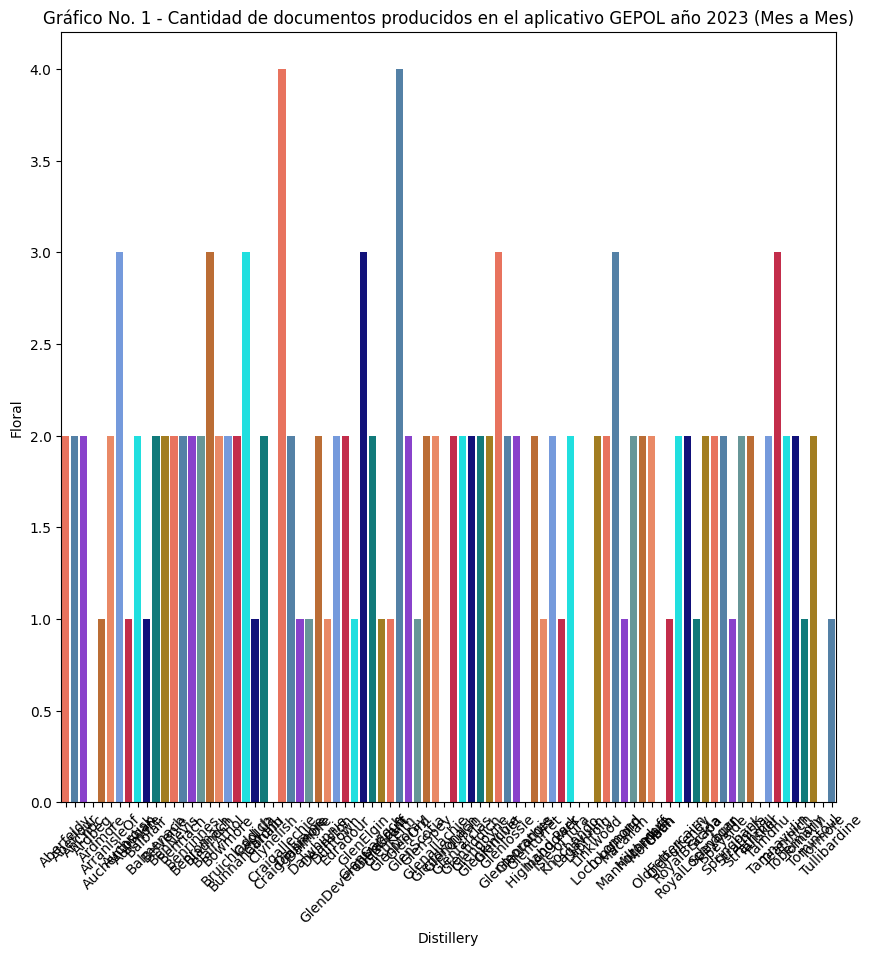

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10)) 
groupedvalues = df.groupby('Distillery').sum().reset_index() #metodo groupby para agrupar los datos por meses.

favorites_colors = ['#FF6347', '#4682B4', 
                   '#8A2BE2', '#5F9EA0', 
                   '#D2691E', '#FF7F50', 
                   '#6495ED', '#DC143C', 
                   '#00FFFF', '#00008B', 
                   '#008B8B', '#B8860B']#codigo de los colores favoritos

"personalizar el gráfico"
g = sns.barplot(x = 'Distillery', 
                y = 'Floral', 
                data = groupedvalues,
                palette=favorites_colors)



plt.xticks(rotation=45)# para que se ve bien presentado el grafico en los meses
plt.title('Gráfico No. 1 - Cantidad de documentos producidos en el aplicativo GEPOL año 2023 (Mes a Mes)')

In [206]:
#se define variable para la detección de variables numericas
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).columns

#se procede con calcular la matriz de correlación
correlation_matrix = df[numeric_columns].corr(numeric_only=True)
correlation_matrix

,RowID,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Latitude,Longitude
RowID,1.000000,-0.102798,0.040397,-0.115659,0.029268,0.115436,-0.147171,0.005704,0.001010,-0.052750,-0.136682,-0.126638,-0.135006,0.328846,0.423429
Body,-0.102798,1.000000,-0.136518,0.524032,0.354050,0.168718,0.082031,0.188500,0.408576,0.126323,-0.116859,-0.013205,-0.461203,-0.141600,-0.039173
Sweetness,0.040397,-0.136518,1.000000,-0.405897,-0.392017,-0.147871,0.132558,-0.054200,0.115727,-0.032493,-0.001516,0.019820,0.144987,0.292199,0.137751
Smoky,-0.115659,0.524032,-0.405897,1.000000,0.686071,0.365501,-0.195318,0.231745,-0.028190,-0.023132,-0.192875,-0.312970,-0.431663,-0.407737,-0.222710
Medicinal,0.029268,0.354050,-0.392017,0.686071,1.000000,0.425106,-0.396629,0.044903,-0.202651,-0.113671,-0.258959,-0.330975,-0.511323,-0.455784,-0.167902
Tobacco,0.115436,0.168718,-0.147871,0.365501,0.425106,1.000000,-0.275490,0.054068,0.009097,-0.117717,-0.059347,-0.235145,-0.212375,-0.002245,0.049398
Honey,-0.147171,0.082031,0.132558,-0.195318,-0.396629,-0.275490,1.000000,0.139563,0.362021,0.188492,0.310184,0.108822,0.183029,-0.003802,-0.099630
Spicy,0.005704,0.188500,-0.054200,0.231745,0.044903,0.054068,0.139563,1.000000,0.092704,-0.042856,0.036303,0.144714,0.034663,0.006883,0.021411
Winey,0.001010,0.408576,0.115727,-0.028190,-0.202651,0.009097,0.362021,0.092704,1.000000,0.198467,0.112368,0.090694,-0.126932,0.144391,0.021925
Nutty,-0.052750,0.126323,-0.032493,-0.023132,-0.113671,-0.117717,0.188492,-0.042856,0.198467,1.000000,0.066157,0.071765,0.018302,-0.058107,-0.070923


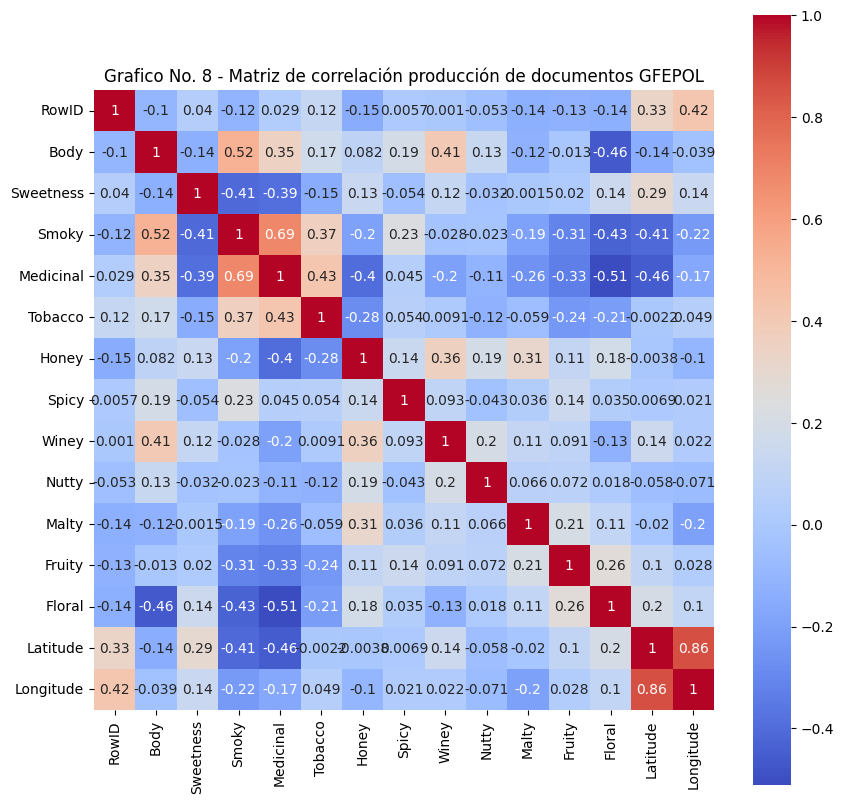

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 10))

sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            square=True)


plt.title('Grafico No. 8 - Matriz de correlación producción de documentos GFEPOL')
plt.show()

In [208]:
df

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,51.610100,-3.062042
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,52.528517,-1.985382
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,53.336380,-6.264557
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,53.177928,-6.801658
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,53.166428,-6.814346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,82,Tobermory,1,1,1,0,0,1,0,0,1,2,2,2,PA75 6NR,150450.000000,755070.000000
82,83,Tomatin,2,3,2,0,0,2,2,1,1,2,0,1,IV13 7YT,279120.000000,829630.000000
83,84,Tomintoul,0,3,1,0,0,2,2,1,1,2,1,2,AB37 9AQ,315100.000000,825560.000000
84,85,Tormore,2,2,1,0,0,1,0,1,2,1,0,0,PH26 3LR,315180.000000,834960.000000


In [209]:
columns_to_drop = ["Latitude", "Longitude"]
df.drop(columns_to_drop, axis=1, inplace=True)
min_value = 53.16642787916022
max_value = -6.814345920229721
df["Latitude"] = np.random.uniform(min_value, max_value, df.shape[0])
df["Longitude"] = np.random.uniform(min_value, max_value, df.shape[0])


In [210]:
#convertir las coordenadas y los valores del monto a listas
coordenadas = df[['Latitude', 'Longitude']].values


In [211]:
#crear un mapa centrado en una ubicación inicial
mapa = folium.Map(location=[49.18339948711526, -0.3706986081067281], zoom_start=12)

In [212]:

#hacer iteración sobre cada fila del archivo Excel
for index, row in df.iterrows():
    #obtener la información necesaria de cada fila
    RowID = row['RowID']
    Distillery = row['Distillery']
    Body = row['Body']
    Sweetness = row['Sweetness']
    Smoky = row['Smoky']
    Medicinal = row['Medicinal']
    Tobacco = row['Tobacco']
    Spicy = row['Spicy']
    Winey = row['Winey']
    Nutty = row['Nutty']
    Malty = row['Malty']
    Fruity = row['Fruity']
    Floral = row['Floral']
    Postcode = row['Postcode']
    Latitude = row['Latitude']
    Longitude = row['Longitude']
    

    #construir la cadena de texto con los datos adicionales
    popup_text = f"<strong>{Distillery}</strong><br>Ubicación: {Postcode}<br>Monto: {Latitude}<br>Reseña: {Longitude}<br></a>"

    # 
    #crear un marcador en el mapa para cada ubicación
    marcador = folium.Marker([Latitude, Longitude], popup=folium.Popup(popup_text, max_width=400), icon=folium.Icon(icon='info-sign'))
    marcador.add_to(mapa)

  

In [213]:
display(mapa)